# **Vehicle Detection**

## **Emergency Vehicle Identification**

In [1]:
##### Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import gc
import os 
import tensorflow as tf
import zipfile

In [2]:
##### Loading Dataset from Kaggle

! pip install -q kaggle

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d abhisheksinghblr/emergency-vehicles-identification

zip_obj = zipfile.ZipFile('/content/emergency-vehicles-identification.zip','r')
zip_obj.extractall('./')
zip_obj.close()

 55% 17.0M/30.9M [00:00<00:00, 35.4MB/s]
100% 30.9M/30.9M [00:00<00:00, 78.1MB/s]


In [2]:
##### Reading Dataset

from sklearn.utils import shuffle
import gc
import skimage.transform as sktr
import skimage.io as skio

train = []
y_train = []
test = []
y_test = []

em_ve_tr = '/content/Emergency_Vehicles/train'
em_ve_te = '/content/Emergency_Vehicles/test'

for filename in os.listdir(em_ve_tr):
  filepath = os.path.join(em_ve_tr,filename)
  train.append(sktr.resize(skio.imread(filepath),(224,224)))

for filename in os.listdir(em_ve_te):
  filepath = os.path.join(em_ve_te,filename)
  test.append(sktr.resize(skio.imread(filepath),(224,224)))

y_train = list(np.array(pd.read_csv('/content/Emergency_Vehicles/train.csv',index_col=0)))
y_test = list(np.array(pd.read_csv('/content/Emergency_Vehicles/test.csv',index_col=0)))

X_train,y_train = shuffle(train,y_train)
X_test,y_test = shuffle(test,y_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

del(train,test)
gc.collect()

0

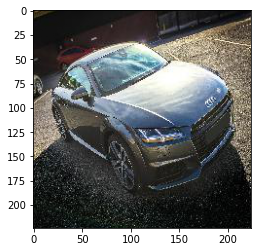

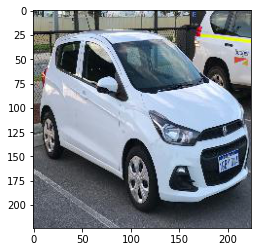

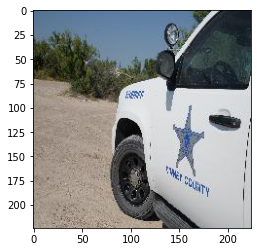

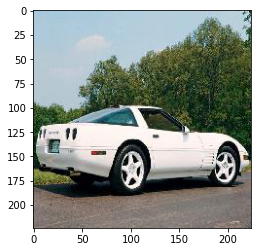

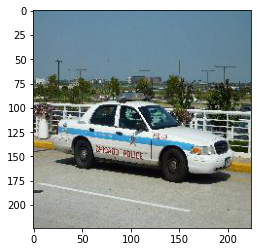

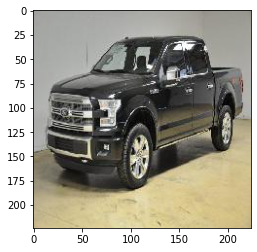

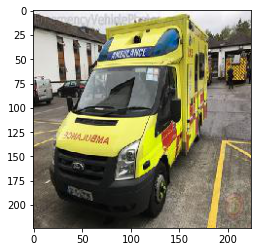

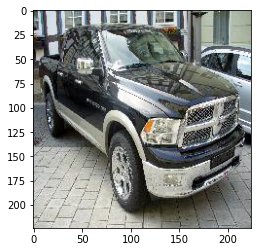

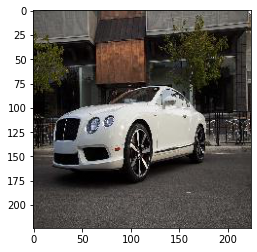

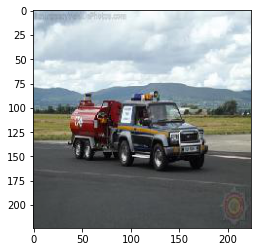

In [27]:
#### Plotting Images
for i in range(10,20):
  plt.imshow(X_train[i])
  plt.show()

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/50
13/13 [==============================] - 36s 3s/step - loss: 0.8792 - accuracy: 0.5128 - val_loss: nan - val_accuracy: nan
Epoch 2/50
13/13 [==============================] - 34s 3s/step - loss: 0.7376 - accuracy: 0.5352 - val_loss: nan - val_accuracy: nan
Epoch 3/50
13/13 [==============================] - 34s 3s/step - loss: 0.7112 - accuracy: 0.5577 - val_loss: nan - val_accuracy: nan
Epoch 4/50
13/13 [==============================] - 34s 3s/step - loss: 0.6936 - accuracy: 0.5662 - val_loss: nan - val_accuracy: nan
Epoch 5/50
13/13 [==============================] - 34s 3s/step - loss: 0.6883 - accuracy: 0.5820 - val_loss: nan - val_accuracy: nan
Epoch 6/50
13/13 [==============================] - 33s 3s/step - loss: 0.7037 - accuracy: 0.5717 - val_loss: nan - val_accuracy: nan
Epoch 7/50
13/13 [==============================] - 33s 3s/step - loss: 0.6868 - accuracy: 0.5687 - val_loss: nan - val_accuracy: n

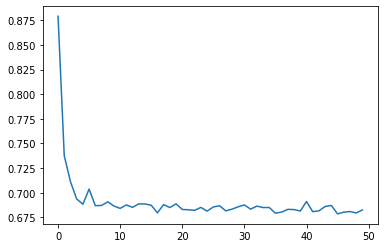

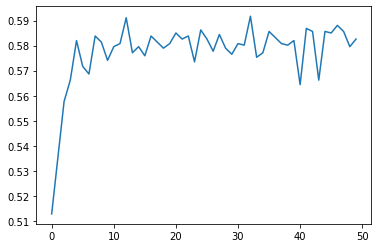

In [4]:
##### Building the Model

#### Defining the Model

base_vggnet = tf.keras.applications.ResNet50(input_shape=(224,224,3),weights='imagenet',include_top=False)
model = base_vggnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Flatten()(model)
model = tf.keras.layers.BatchNormalization()(model)
model = tf.keras.layers.Dense(units=256,activation='relu')(model)
model = tf.keras.layers.BatchNormalization()(model)
model = tf.keras.layers.Dense(units=128,activation='relu')(model)
model = tf.keras.layers.BatchNormalization()(model)
model = tf.keras.layers.Dense(units=1,activation='sigmoid')(model)

model = tf.keras.models.Model(inputs=base_vggnet.input,outputs=model)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Data Augmentation
data_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=359,width_shift_range=0.4,height_shift_range=0.4,shear_range=10,zoom_range=[0.7,1.0],brightness_range=[0.5,1.5])
data_gen_dev = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=359,width_shift_range=0.4,height_shift_range=0.4,shear_range=10,zoom_range=[0.7,1.0],brightness_range=[0.5,1.5])

train_gen = data_gen_train.flow(X_train,y_train,batch_size=128,shuffle=True)
test_gen = data_gen_train.flow(X_test,y_test,batch_size=128,shuffle=True)

#### Defining Callbacks
filepath="weights_em.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,monitor='accuracy',save_best_only=True,mode='max')

#### Training the Model
history = model.fit(train_gen,validation_data=test_gen,epochs=50,callbacks=checkpoint)

#### Plotting Metrics
plt.plot(history.history['loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.show()

In [9]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#### Predicting

i = 0

for images in X_test[10:15]:
  plt.imshow(images)
  print(y_test[])